# Data Mining Assignment 1

This notebook contains the steps for completing Data Mining Assignment 1, including initial data analysis, preprocessing, and a summary of findings.

## 1. Initial Data Analysis

### 1.1 Load the Dataset
We start by loading the dataset and examining its structure.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

os.makedirs('plots/initial_analysis', exist_ok=True)
os.makedirs('plots/preprocessing', exist_ok=True)
os.makedirs('plots/results', exist_ok=True)

# Load the dataset
df = pd.read_csv('superstore.csv')

chinese_col = "记录数"  
if chinese_col in df.columns:
    if df[chinese_col].nunique() == 1:
        print(f"Removing column '{chinese_col}' as it only contains the single value: {df[chinese_col].unique()[0]}")
        df = df.drop(columns=[chinese_col])

# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Data Types:")
print(df.dtypes)

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Removing column '记录数' as it only contains the single value: 1
Dataset Shape: (61510, 26)
Number of Rows: 61510
Number of Columns: 26

Column Data Types:
Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity          float64
Region             object
Row.ID            float64
Sales             float64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year              float64
Market2            object
weeknum           float64
dtype: object

First 5 rows:


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Technologyufg,Soyapangooha,El Salvadorskv,LD-168553,Lela Donovan,0.0,LATAM,2010-05-06 03:31:50.299000,MX-2011-159135xlv,NaN,...,10034.535417,NaN,NaN,Standard Class,NaN,NaN,NaN,2011.0,LATAM,NaN
1,Office Supplies,Tegucigalpa,NaN,YS-218803rne,Yana Sorensen,0.4,NaN,2012-11-21 00:00:00,US-2012-134439,Mediumxao,...,-414.847578,Corporatetzn,2012-11-26 00:00:00,Standard Classpxz,7.482000,NaN,Suppliesnpi,2012.0,LATAM,47.0
2,NaN,Philadelphia,United States,MH-172904abh,Marc Harriganiyq,NaN,US,2019-06-17 04:14:51.732000,US-2014-141558ump,Medium,...,1773.402473,Home Office,NaN,Standard Classyqh,58.530000,Pennsylvaniagoi,Phones,NaN,North Americaddi,11.0
3,NaN,Franklin,United Stateshcr,DK-128954,Dana Kaydos,0.2,US,2013-11-02 07:10:18.270000,NaN,Medium,...,-6007.876794,Consumer,2014-09-02 00:00:00,Standard Class,396.664728,Tennessee,Paperdpo,2014.0,NaN,35.0
4,NaN,Ufa,NaN,PB-88053,Patrick Bzostek,0.0,EMEA,2013-07-17 00:00:00,RS-2013-1610,Critical,...,NaN,NaN,2013-07-19 00:00:00,First Class,41.210000,NaN,NaN,2013.0,EMEA,NaN


### 1.2 Descriptive Statistics
Next, we extract descriptive statistics for each column.

In [23]:
# Get descriptive statistics for numerical columns
numeric_stats = df.describe()

# Get information about categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_stats = {col: {'unique_values': df[col].nunique(),
                          'most_common': df[col].value_counts().nlargest(3).to_dict()} 
                    for col in categorical_cols}

print("Numerical Statistics:")
display(numeric_stats)

print("\nCategorical Column Statistics:")
for col, stats in categorical_stats.items():
    print(f"\n{col}:")
    print(f"  Unique values: {stats['unique_values']}")
    print(f"  Most common values:")
    for val, count in stats['most_common'].items():
        print(f"    {val}: {count}")

Numerical Statistics:


,Discount,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,46443.000000,46366.000000,46291.000000,46511.000000,46376.000000,46259.000000,46472.000000,46441.000000
mean,0.147037,28.172046,3.527138,25713.573506,369.368030,33.012632,2012.778700,31.422582
std,0.436491,4583.903068,6.514211,27981.977056,8624.642273,421.191313,1.762896,27.823177
min,-2.869426,-35296.890401,-44.181102,-177110.615548,-64239.483753,-3195.589037,2000.511941,-180.514406
25%,0.000000,-22.333125,1.864170,11957.596318,16.000000,1.320000,2012.000000,19.000000
50%,0.002000,9.360000,3.000000,25784.000000,87.000000,8.240000,2013.000000,33.000000
75%,0.293420,93.714700,5.000000,39312.741003,521.403163,50.460000,2014.000000,45.000000
max,3.647038,36992.755120,58.851298,229093.358454,77310.736188,4082.400696,2024.448467,234.284392



Categorical Column Statistics:

Category:
  Unique values: 11112
  Most common values:
    Office Supplies: 18851
    Technology: 6051
    Furniture: 5904

City:
  Unique values: 16102
  Most common values:
    New York City: 558
    Los Angeles: 472
    Philadelphia: 327

Country:
  Unique values: 12600
  Most common values:
    United States: 6013
    France: 1683
    Australia: 1679

Customer.ID:
  Unique values: 17404
  Most common values:
    JG-158052: 30
    WB-218504: 29
    VT-217001: 29

Customer.Name:
  Unique values: 13696
  Most common values:
    Chloris Kastensmidt: 73
    Eric Murdock: 72
    Brosina Hoffman: 71

Market:
  Unique values: 11923
  Most common values:
    APAC: 6593
    LATAM: 6195
    EU: 6058

Order.Date:
  Unique values: 15304
  Most common values:
    2014-11-18 00:00:00: 83
    2014-06-18 00:00:00: 80
    2014-12-10 00:00:00: 80

Order.ID:
  Unique values: 29721
  Most common values:
    CA-2014-100111: 12
    NI-2014-8880: 12
    IT-2014-2009199: 12

### 1.3 Identify Missing Values
We check for missing values in the dataset.

Total Missing Values: 396758
Columns with Missing Values: 26


,Missing Values,Percentage (%)
Country,15511,25.217038
Market,15492,25.186149
Region,15479,25.165014
State,15475,25.158511
Customer.ID,15459,25.132499
Product.ID,15417,25.064217
Market2,15406,25.046334
Order.ID,15327,24.917900
Ship.Mode,15317,24.901642
Segment,15275,24.833360


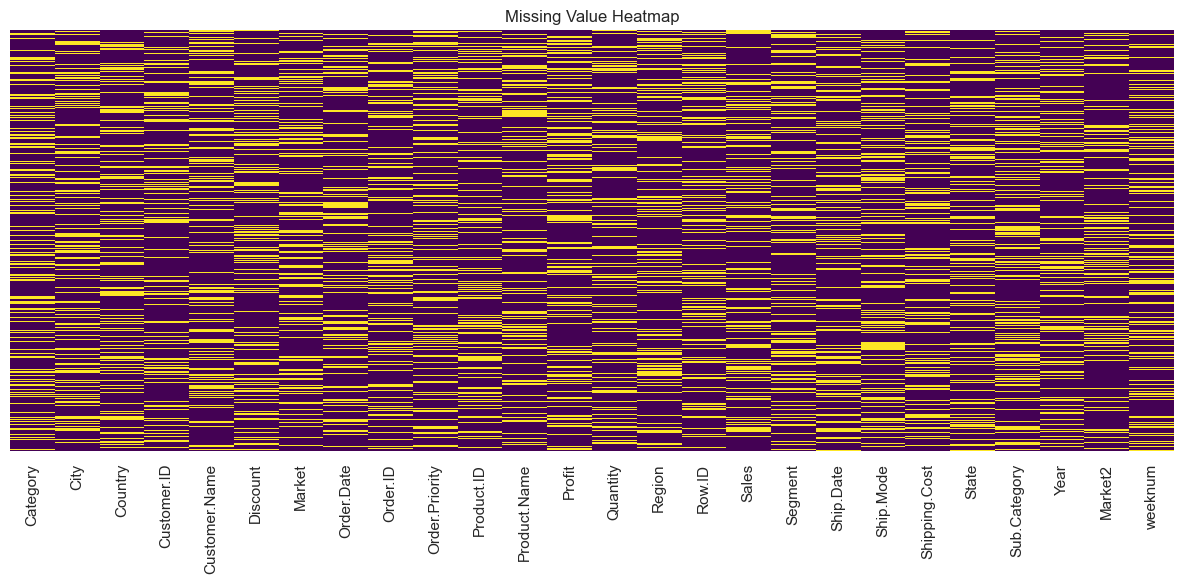

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print(f"Total Missing Values: {df.isnull().sum().sum()}")
print(f"Columns with Missing Values: {len(missing_df)}")
display(missing_df)

# Visualization of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

### 1.4 Data Quality Assessment
We assess data quality by checking for duplicates.

In [25]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check for unusual values in categorical columns
print("\nData Quality Check for Categorical Columns:")
for col in categorical_cols:
    unusual_pattern = False
    # Check for values with unusual characters or patterns
    unusual_values = [val for val in df[col].dropna().unique() if isinstance(val, str) and any(c.isdigit() and c.isalpha() for c in val)]
    if unusual_values:
        unusual_pattern = True
        print(f"\n{col} has values with unusual patterns: {unusual_values[:5]}")
    
    # Check for extremely long values
    long_values = [val for val in df[col].dropna().unique() if isinstance(val, str) and len(val) > 50]
    if long_values:
        unusual_pattern = True
        print(f"\n{col} has unusually long values")

# Check for unusual values in numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
print("\nData Quality Check for Numerical Columns:")
for col in numeric_cols:
    # Check for implausible values
    min_val = df[col].min()
    max_val = df[col].max()
    if min_val < -10000 or max_val > 100000:
        print(f"\n{col} has potentially implausible values: Min={min_val}, Max={max_val}")

# Check for consistency in date columns
date_cols = ['Order.Date', 'Ship.Date']
for col in date_cols:
    if col in df.columns:
        try:
            # Convert to datetime
            df[col] = pd.to_datetime(df[col], errors='coerce')
            invalid_dates = df[col].isnull().sum()
            if invalid_dates > 0:
                print(f"\n{col} has {invalid_dates} invalid date values")
            
            # Check for dates too far in future or past
            if not df[col].isnull().all():
                min_date = df[col].min()
                max_date = df[col].max()
                print(f"\n{col} date range: {min_date} to {max_date}")
                
                # Check for implausible dates
                if min_date.year < 1900 or max_date.year > 2023:
                    print(f"  Warning: {col} has dates outside reasonable range")
        except:
            print(f"Could not process {col} as date column")

Number of duplicate rows: 831

Data Quality Check for Categorical Columns:

Product.Name has unusually long values

Data Quality Check for Numerical Columns:

Profit has potentially implausible values: Min=-35296.890401181125, Max=36992.75512047722

Row.ID has potentially implausible values: Min=-177110.61554783204, Max=229093.35845390763

Sales has potentially implausible values: Min=-64239.48375251293, Max=77310.73618781174

Order.Date has 46333 invalid date values

Order.Date date range: 2005-09-30 19:10:30.746000 to 2020-03-31 20:59:10.562000

Ship.Date has 31256 invalid date values

Ship.Date date range: 2010-06-18 03:29:08 to 2018-02-25 00:09:46


### 1.5 Data Visualization
We create various visualizations to understand the data better.

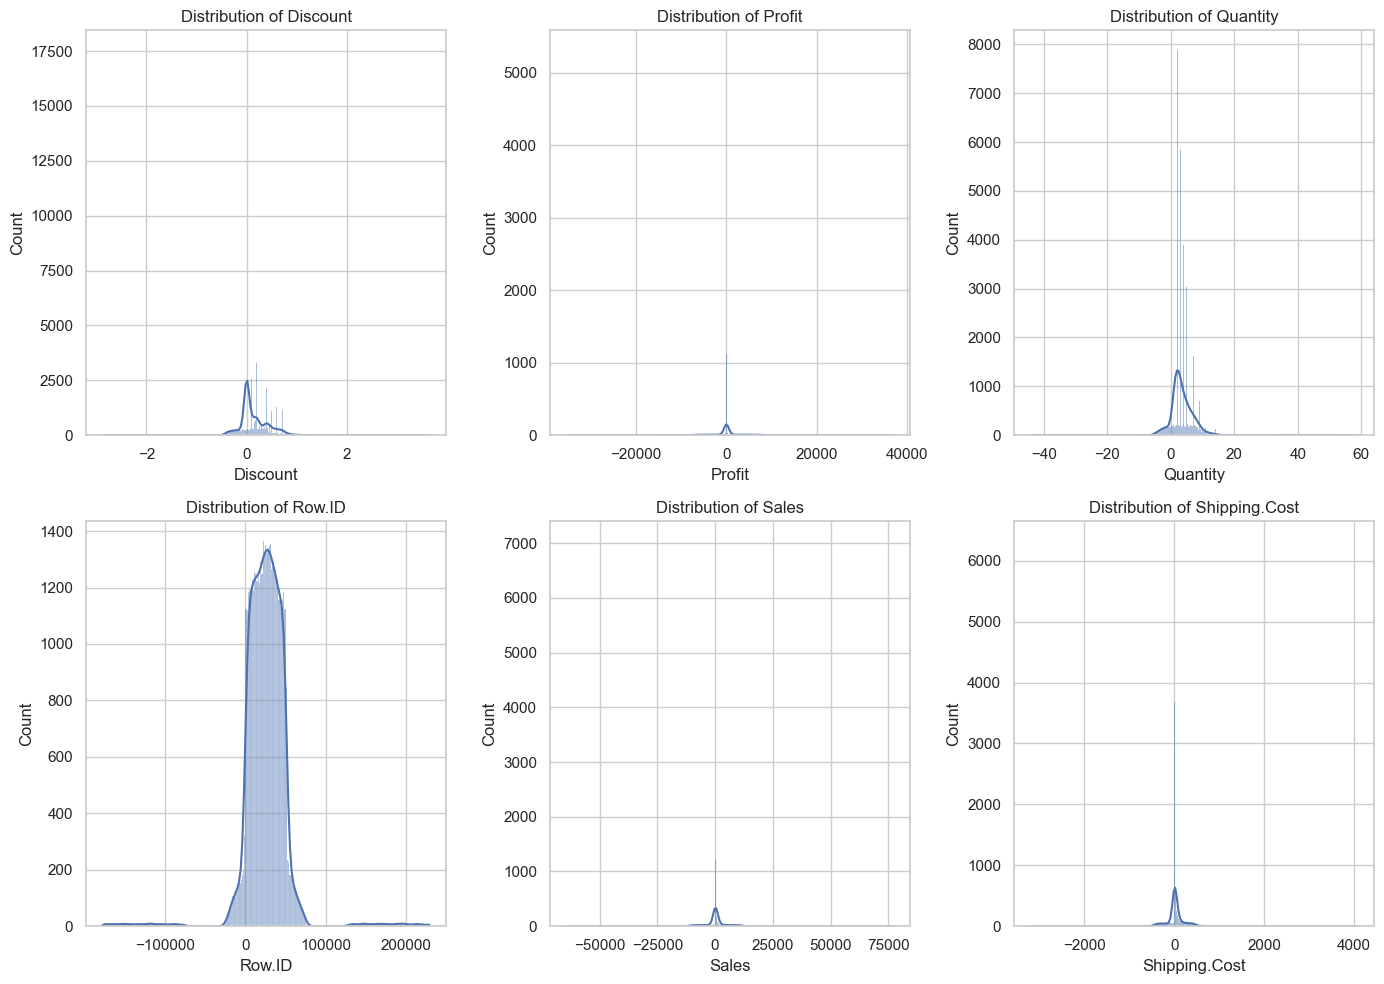

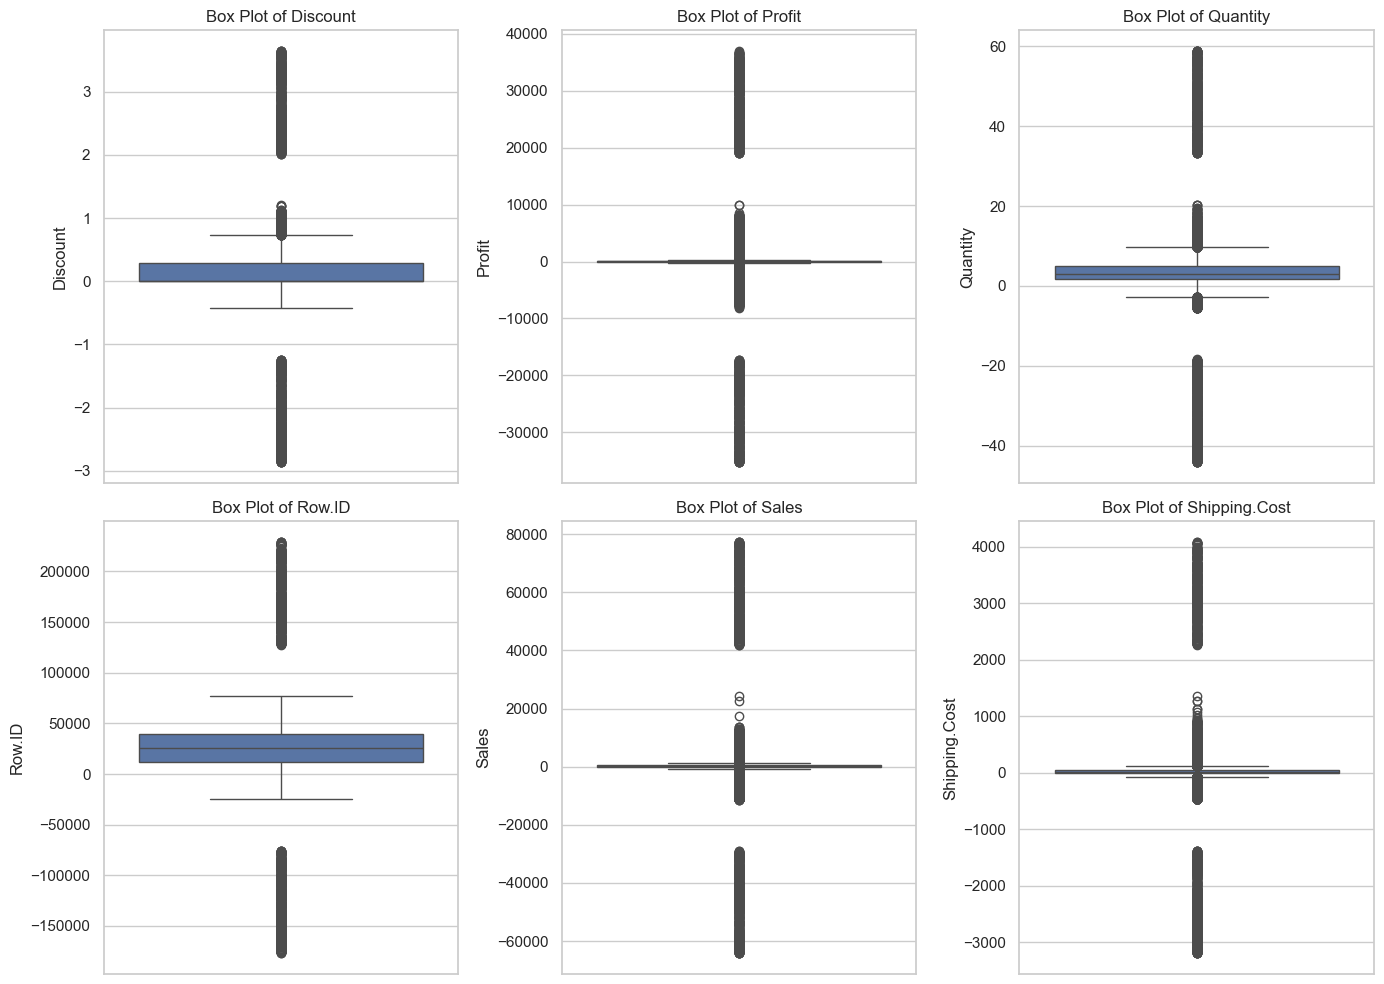

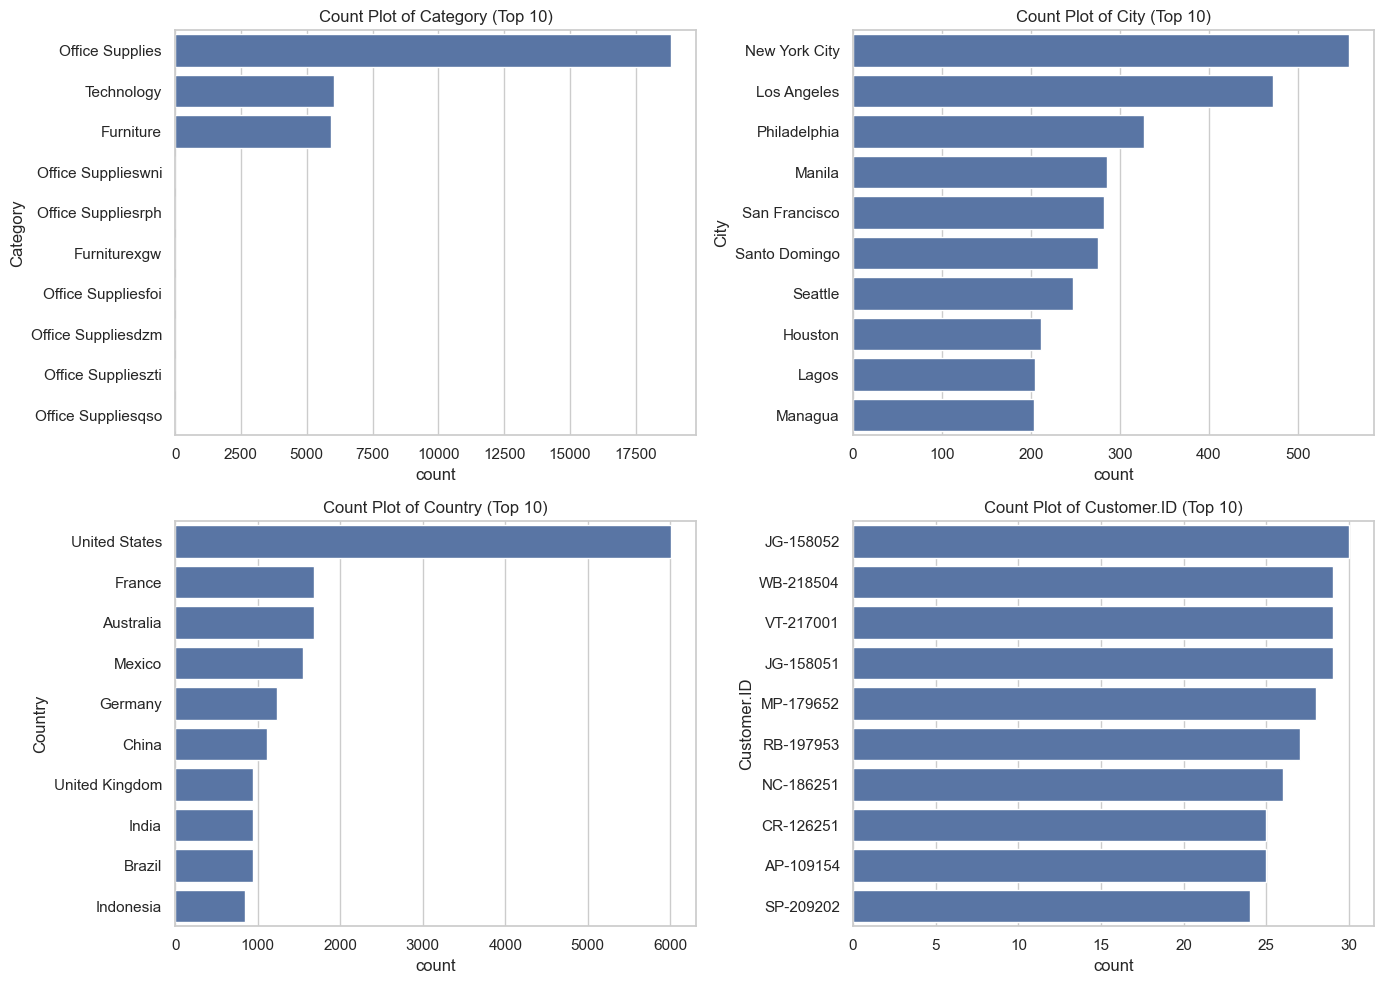

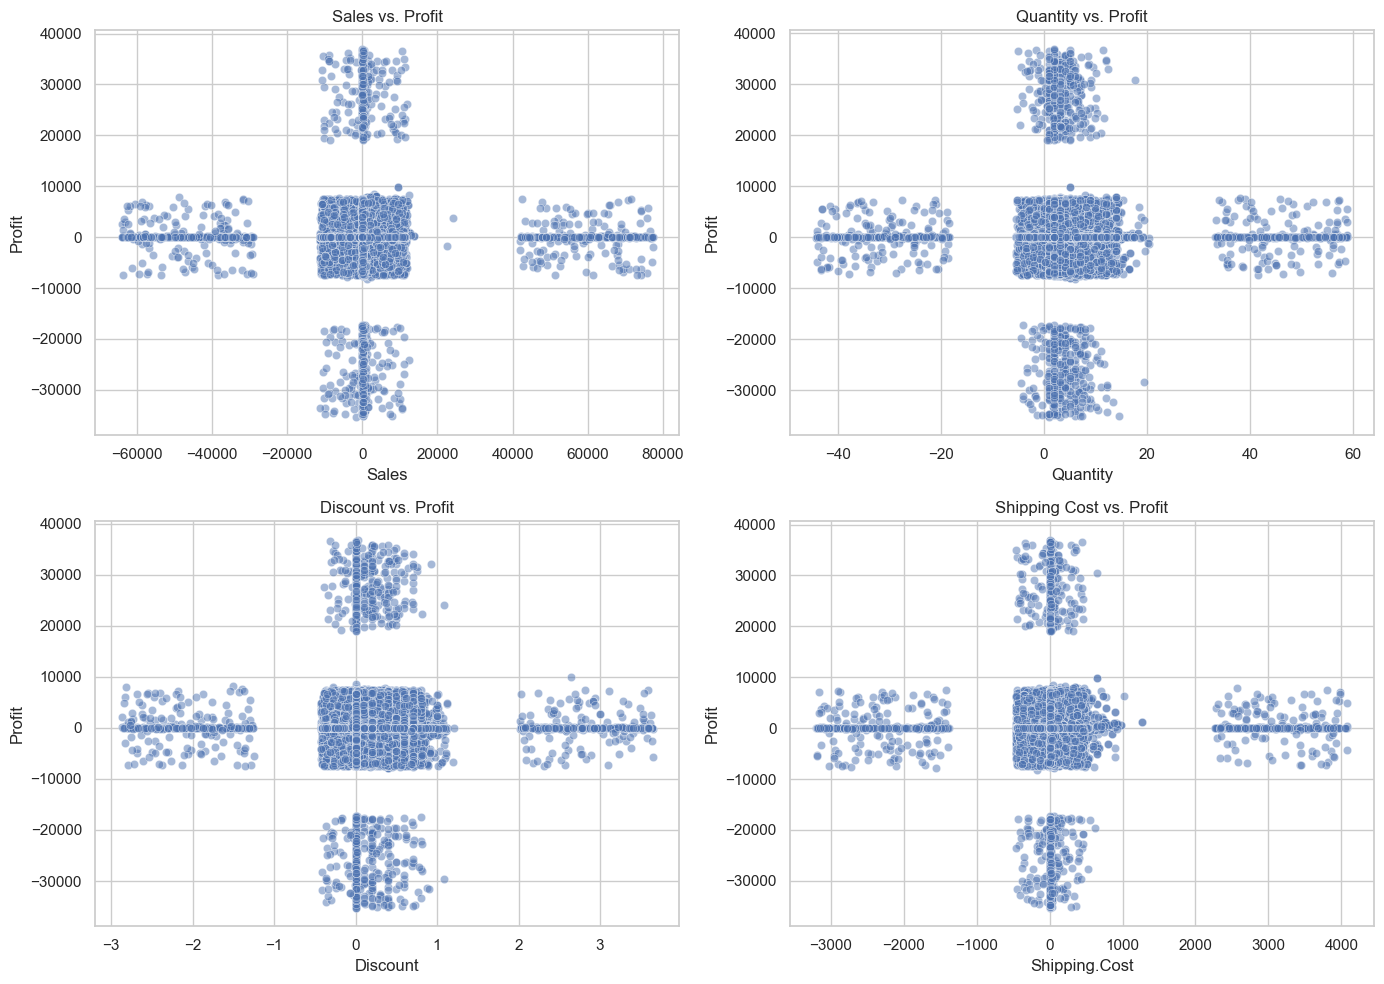

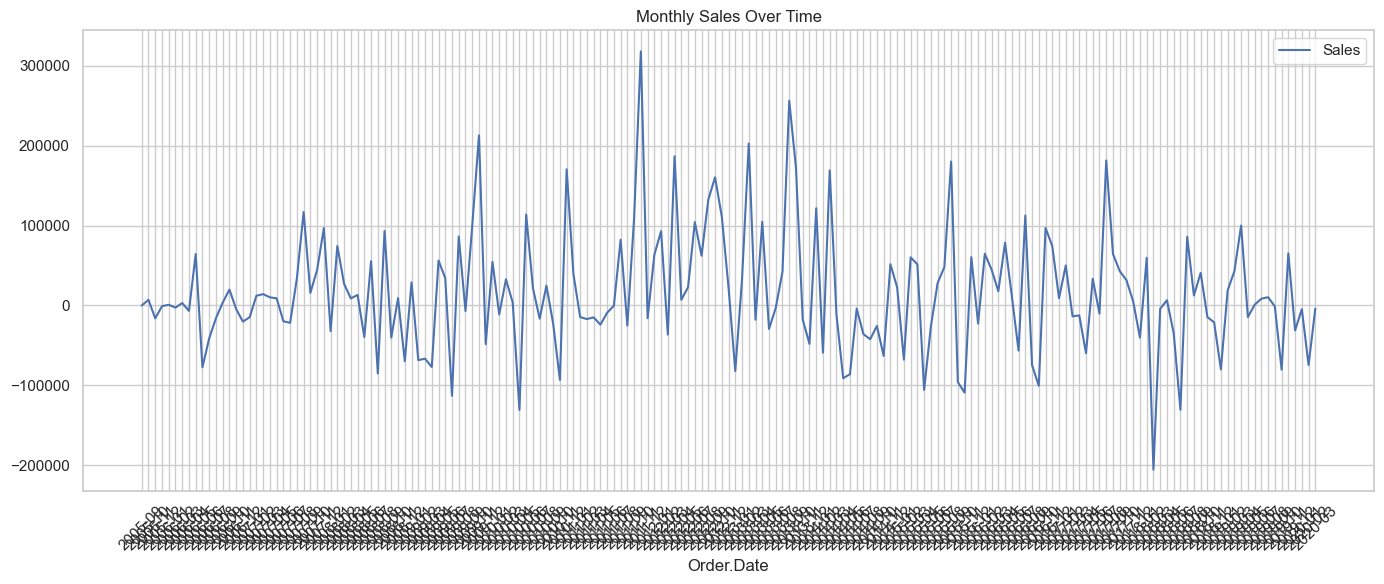

In [26]:
# Convert date columns to datetime format
for col in ['Order.Date', 'Ship.Date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Set up visual style
sns.set(style="whitegrid")

# Create histograms for numerical columns (top 6)
num_cols = df.select_dtypes(include=['number']).columns[:6]  # Limit to 6 columns for better visibility
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.savefig('plots/initial_analysis/numerical_distributions.png')
plt.show()

# Create box plots for numerical columns to identify outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.savefig('plots/initial_analysis/boxplots.png')
plt.show()

# Create countplots for categorical columns (top 4)
cat_cols = df.select_dtypes(include=['object']).columns[:4]  # Limit to 4 columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[df[col].isin(top_categories)][col], order=top_categories)
    plt.title(f'Count Plot of {col} (Top 10)')
    plt.tight_layout()
plt.savefig('plots/initial_analysis/categorical_counts.png')
plt.show()

# Create scatter plots for pairs of numerical variables
plt.figure(figsize=(14, 10))
if 'Sales' in df.columns and 'Profit' in df.columns:
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
    plt.title('Sales vs. Profit')

if 'Quantity' in df.columns and 'Profit' in df.columns:
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Quantity', y='Profit', data=df, alpha=0.5)
    plt.title('Quantity vs. Profit')

if 'Discount' in df.columns and 'Profit' in df.columns:
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
    plt.title('Discount vs. Profit')

if 'Shipping.Cost' in df.columns and 'Profit' in df.columns:
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='Shipping.Cost', y='Profit', data=df, alpha=0.5)
    plt.title('Shipping Cost vs. Profit')
plt.tight_layout()
plt.savefig('plots/initial_analysis/scatter_plots.png')
plt.show()

# Time series analysis if date columns are available
if 'Order.Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Order.Date']):
    plt.figure(figsize=(14, 6))
    monthly_sales = df.groupby(df['Order.Date'].dt.to_period('M')).agg({'Sales': 'sum'})
    monthly_sales.index = monthly_sales.index.astype(str)
    sns.lineplot(data=monthly_sales)
    plt.title('Monthly Sales Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('plots/initial_analysis/time_series.png')
    plt.show()

### 1.6 Checklist of Issues
We create a checklist of identified issues.

In [27]:
# Create a checklist of identified issues and proposed solutions
issues = []

# Check for missing values
for col in df.columns:
    missing_pct = df[col].isnull().mean() * 100
    if missing_pct > 0:
        issues.append({
            'Column': col,
            'Issue': f'Missing values ({missing_pct:.2f}%)',
            'Solution': 'Mean imputation for numerical, mode imputation for categorical'
        })

# Check for outliers in numerical columns
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        issues.append({
            'Column': col,
            'Issue': f'Contains {outlier_count} outliers',
            'Solution': 'Apply IQR method or z-score to remove or cap outliers'
        })

# Check for inconsistent data in categorical columns
for col in categorical_cols:
    # Check for similar values with different cases or trailing spaces
    cleaned_values = df[col].dropna().apply(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
    if cleaned_values.nunique() < df[col].dropna().nunique():
        issues.append({
            'Column': col,
            'Issue': 'Inconsistent formatting (case, spaces)',
            'Solution': 'Standardize text (lowercase, trim spaces)'
        })

# Check for strange date values
for col in ['Order.Date', 'Ship.Date']:
    if col in df.columns:
        try:
            dates = pd.to_datetime(df[col], errors='coerce')
            invalid_dates = dates.isnull().sum()
            if invalid_dates > 0:
                issues.append({
                    'Column': col,
                    'Issue': f'{invalid_dates} invalid date values',
                    'Solution': 'Parse dates correctly or fill with interpolation'
                })
        except:
            pass

# Check for duplicates
if df.duplicated().sum() > 0:
    issues.append({
        'Column': 'Multiple columns',
        'Issue': f'{df.duplicated().sum()} duplicate rows',
        'Solution': 'Remove duplicate rows'
    })

# Display the issues in a DataFrame
issues_df = pd.DataFrame(issues)
print("Data Quality Issues Checklist:")
display(issues_df)

# Save the issues to a CSV file
issues_df.to_csv('data_issues_checklist.csv', index=False)

Data Quality Issues Checklist:


,Column,Issue,Solution
0,Category,Missing values (24.80%),"Mean imputation for numerical, mode imputation..."
1,City,Missing values (24.76%),"Mean imputation for numerical, mode imputation..."
2,Country,Missing values (25.22%),"Mean imputation for numerical, mode imputation..."
3,Customer.ID,Missing values (25.13%),"Mean imputation for numerical, mode imputation..."
4,Customer.Name,Missing values (24.83%),"Mean imputation for numerical, mode imputation..."
5,Discount,Missing values (24.50%),"Mean imputation for numerical, mode imputation..."
6,Market,Missing values (25.19%),"Mean imputation for numerical, mode imputation..."
7,Order.Date,Missing values (75.33%),"Mean imputation for numerical, mode imputation..."
8,Order.ID,Missing values (24.92%),"Mean imputation for numerical, mode imputation..."
9,Order.Priority,Missing values (24.79%),"Mean imputation for numerical, mode imputation..."


## 2. Data Preprocessing

### 2.1 Handle Missing Values
We handle missing values using mean imputation for numerical columns and forward fill for categorical columns.

In [28]:
# Make a copy of the original dataframe
df_clean = df.copy()

# Method 1: Mean/Mode imputation
# For numerical columns
numerical_cols = df_clean.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        mean_val = df_clean[col].mean()
        df_clean[col + '_mean_imputed'] = df_clean[col].fillna(mean_val)
        print(f"Filled {col} with mean value: {mean_val}")

# For categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col + '_mode_imputed'] = df_clean[col].fillna(mode_val)
        print(f"Filled {col} with mode value: {mode_val}")

# Method 2: Forward fill and backward fill for time series data
if 'Order.Date' in df_clean.columns:
    # Sort by Order.Date
    df_clean_sorted = df_clean.sort_values('Order.Date')
    
    # Apply forward fill and backward fill
    # For numerical columns
    for col in numerical_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col + '_ffill_imputed'] = df_clean_sorted[col].ffill().bfill()
            print(f"Filled {col} using forward fill and backward fill")
            
    # For categorical columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col + '_ffill_imputed'] = df_clean_sorted[col].ffill().bfill()
            print(f"Filled {col} using forward fill and backward fill")

# Check the number of missing values after imputation
print("\nMissing values after imputation:")
print(df_clean.isnull().sum().sum(), "total missing values remain in the original columns")

# Apply the best method to the dataset for further processing
# We'll use method 1 for simplicity
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("\nRemaining missing values after final imputation:", df_clean.isnull().sum().sum())

Filled Discount with mean value: 0.14703739906728308
Filled Profit with mean value: 28.172045701929132
Filled Quantity with mean value: 3.527137865795766
Filled Row.ID with mean value: 25713.573506456956
Filled Sales with mean value: 369.36803045492167
Filled Shipping.Cost with mean value: 33.012632280551074
Filled Year with mean value: 2012.778699717277
Filled weeknum with mean value: 31.42258192896727
Filled Category with mode value: Office Supplies
Filled City with mode value: New York City
Filled Country with mode value: United States
Filled Customer.ID with mode value: JG-158052
Filled Customer.Name with mode value: Chloris Kastensmidt
Filled Market with mode value: APAC
Filled Order.ID with mode value: CA-2014-100111
Filled Order.Priority with mode value: Medium
Filled Product.ID with mode value: OFF-AR-10003651
Filled Product.Name with mode value: Staples
Filled Region with mode value: Central
Filled Segment with mode value: Consumer
Filled Ship.Mode with mode value: Standard Cl

### 2.2 Remove Outliers
We remove outliers using the IQR method.

Outliers detected and removed using IQR method:
Discount: Removed 6824 outliers using IQR method
Profit: Removed 18612 outliers using IQR method
Quantity: Removed 5121 outliers using IQR method
Row.ID: Removed 1187 outliers using IQR method
Sales: Removed 7834 outliers using IQR method
Shipping.Cost: Removed 5399 outliers using IQR method
Year: Removed 297 outliers using IQR method
weeknum: Removed 728 outliers using IQR method
Discount_mean_imputed: Removed 1695 outliers using IQR method
Profit_mean_imputed: Removed 996 outliers using IQR method
Quantity_mean_imputed: Removed 1125 outliers using IQR method
Row.ID_mean_imputed: Removed 33 outliers using IQR method
Sales_mean_imputed: Removed 13 outliers using IQR method
Shipping.Cost_mean_imputed: Removed 24 outliers using IQR method
Year_mean_imputed: Removed 21 outliers using IQR method
weeknum_mean_imputed: Removed 287 outliers using IQR method
Discount_ffill_imputed: Removed 650 outliers using IQR method
Profit_ffill_imputed: Remov

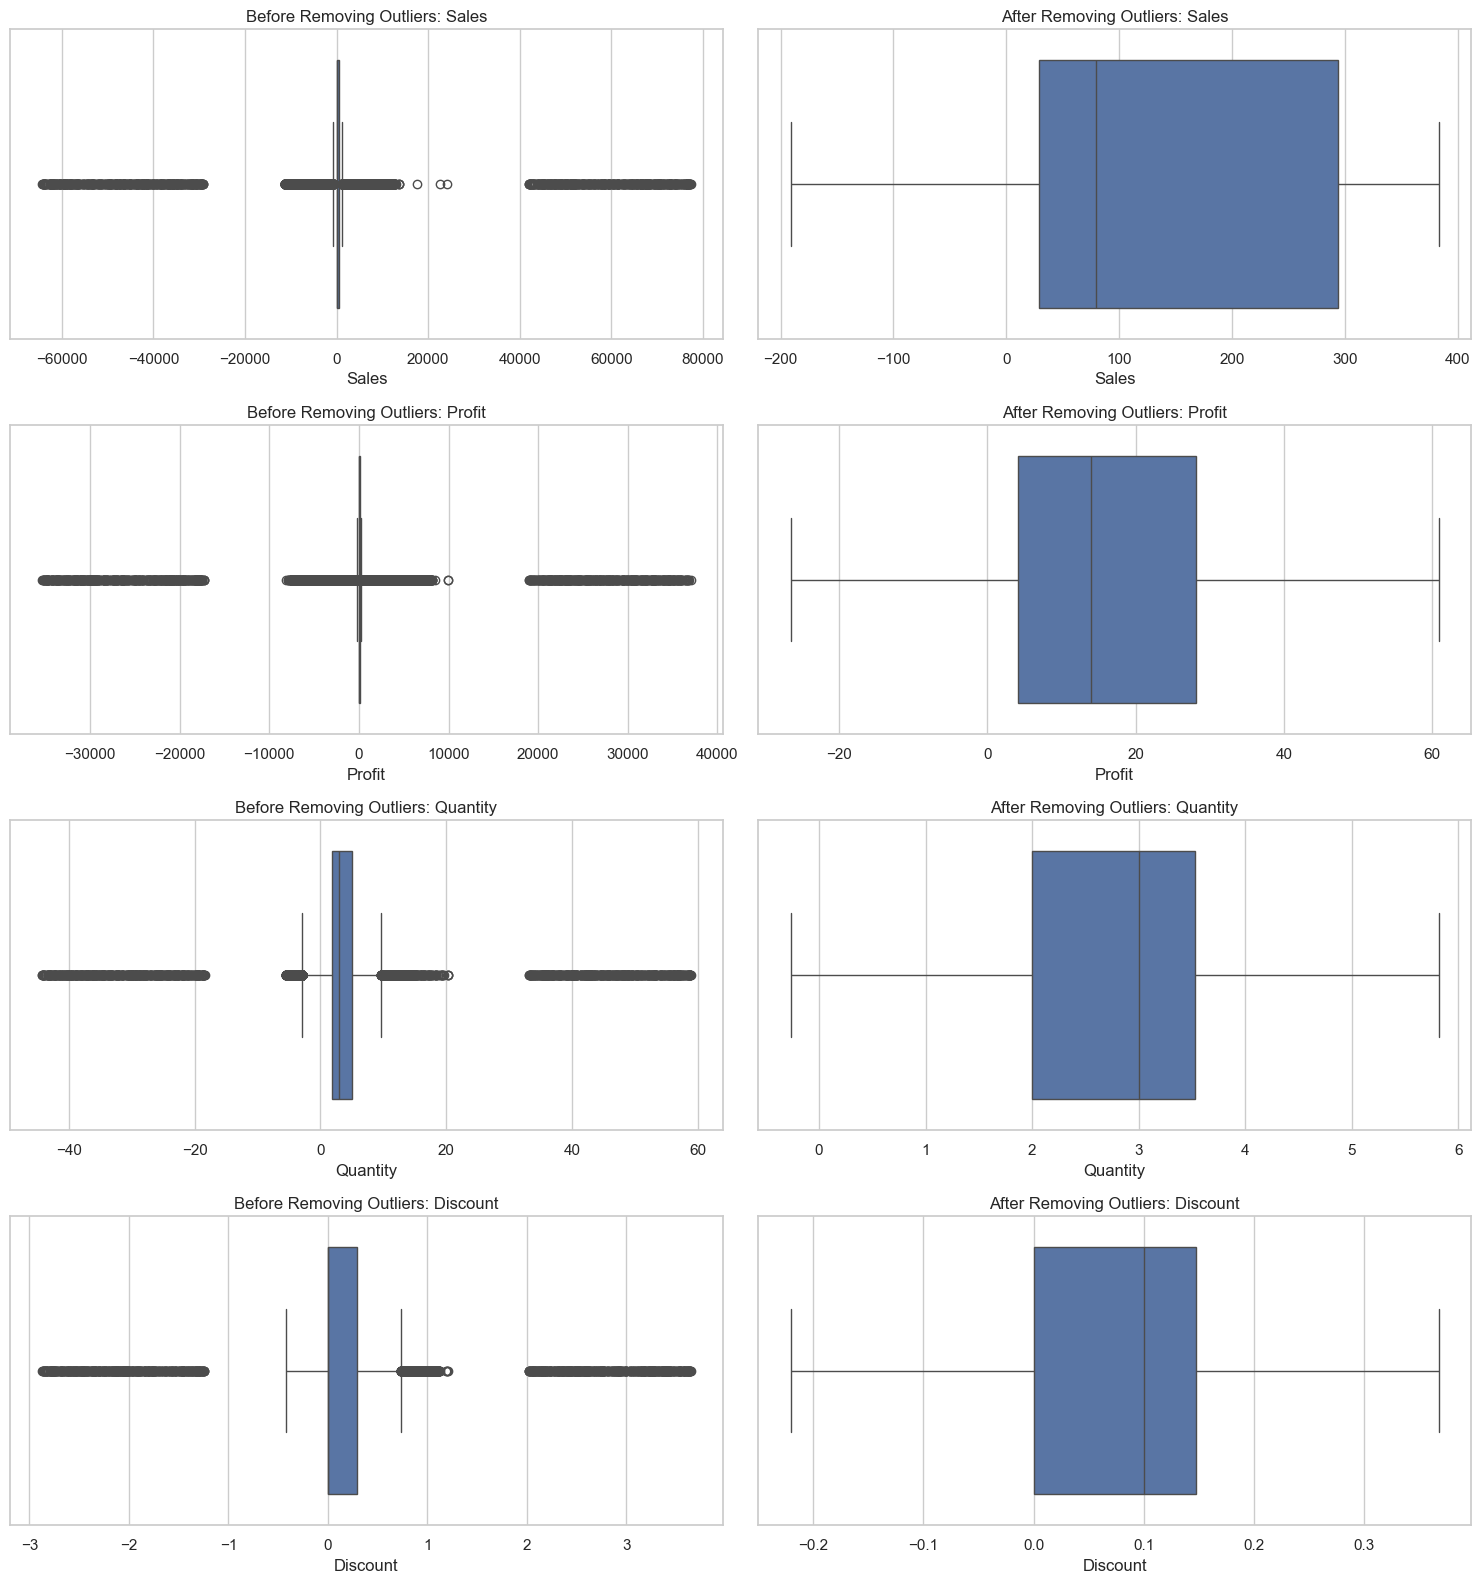


Original dataset shape: (61510, 26)
Dataset shape after removing outliers: (5323, 74)
Removed 56187 rows as outliers


In [29]:
# Make a copy of the cleaned dataframe
df_no_outliers = df_clean.copy()

# Method 1: IQR method for outlier detection and removal
def remove_outliers_iqr(df, column, lower_factor=1.5, upper_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - lower_factor * IQR
    upper_bound = Q3 + upper_factor * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return cleaned_df, outliers, lower_bound, upper_bound

# Method 2: Z-score method
def remove_outliers_zscore(df, column, threshold=3):
    from scipy import stats
    z_scores = stats.zscore(df[column], nan_policy='omit')
    outliers = df[abs(z_scores) > threshold]
    cleaned_df = df[abs(z_scores) <= threshold]
    return cleaned_df, outliers

# Apply IQR method to numerical columns
print("Outliers detected and removed using IQR method:")
numerical_cols = df_no_outliers.select_dtypes(include=['number']).columns
outlier_info = {}

for col in numerical_cols:
    if df_no_outliers[col].nunique() > 1:  # Skip columns with only one value
        df_iqr, outliers_iqr, lower_bound, upper_bound = remove_outliers_iqr(df_no_outliers, col)
        
        if not outliers_iqr.empty:
            outlier_info[col] = {
                'method': 'IQR',
                'num_outliers': len(outliers_iqr),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'original_min': df_no_outliers[col].min(),
                'original_max': df_no_outliers[col].max()
            }
            
            # Apply the IQR method
            df_no_outliers = df_iqr
            
            print(f"{col}: Removed {len(outliers_iqr)} outliers using IQR method")

# Create visualization of before and after removing outliers for key columns
key_columns = ['Sales', 'Profit', 'Quantity', 'Discount']
key_columns = [col for col in key_columns if col in df_no_outliers.columns]

if key_columns:
    plt.figure(figsize=(15, len(key_columns) * 4))
    
    for i, col in enumerate(key_columns):
        if col in outlier_info:
            plt.subplot(len(key_columns), 2, i*2+1)
            sns.boxplot(x=df[col])
            plt.title(f'Before Removing Outliers: {col}')
            
            plt.subplot(len(key_columns), 2, i*2+2)
            sns.boxplot(x=df_no_outliers[col])
            plt.title(f'After Removing Outliers: {col}')
    
    plt.tight_layout()
    plt.savefig('plots/preprocessing/outlier_removal.png')
    plt.show()

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")
print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} rows as outliers")

### 2.3 Correct Inconsistent Data
We correct inconsistent data, such as standardizing country names.

In [35]:
# Make a copy of the outlier-free dataframe
df_consistent = df_no_outliers.copy()

# 1. Standardize country names
if 'Country' in df_consistent.columns:
    # Create a mapping dictionary for country name standardization
    country_mapping = {
        'usa': 'United States',
        'united states': 'United States',
        'us': 'United States',
        'u.s.a.': 'United States',
        'united states of america': 'United States',
        'uk': 'United Kingdom',
        'britain': 'United Kingdom',
        'england': 'United Kingdom'
    }
    
    # Apply standardization
    df_consistent['Country_cleaned'] = df_consistent['Country'].str.strip().str.lower()
    df_consistent['Country_cleaned'] = df_consistent['Country_cleaned'].replace(country_mapping)
    df_consistent['Country_cleaned'] = df_consistent['Country_cleaned'].str.title()
    
    # Check for changes
    changed = (df_consistent['Country'] != df_consistent['Country_cleaned']).sum()
    print(f"Standardized {changed} country names")
    
    # Replace the original column
    df_consistent['Country'] = df_consistent['Country_cleaned']
    df_consistent.drop('Country_cleaned', axis=1, inplace=True)

# Clean up Category values by removing random suffixes
if 'Category' in df_consistent.columns:
    # Define the main category names to standardize to
    category_base_names = ['Office Supplies', 'Furniture', 'Technology']
    
    # Function to match a value to its base category
    def clean_category(cat_value):
        if pd.isna(cat_value):
            return cat_value
        
        cat_value = str(cat_value).strip()
        for base_name in category_base_names:
            if cat_value.lower().startswith(base_name.lower()):
                return base_name
        return cat_value  # Return original if no match
    
    # Apply the cleaning function
    original_values = df_consistent['Category'].copy()
    df_consistent['Category'] = df_consistent['Category'].apply(clean_category)
    
    # Count how many values were changed
    changed = (original_values != df_consistent['Category']).sum()
    print(f"Standardized {changed} category values by removing random suffixes")

# 2. Clean column names by removing suffixes
for col in df_consistent.columns:
    if any(suffix in col for suffix in ['ufg', 'eji', 'jds', 'wxl', 'yjx']):
        clean_col_name = ''.join([c for c in col if c.isalnum() or c in ['.', '_', ' ']])
        df_consistent.rename(columns={col: clean_col_name}, inplace=True)
        print(f"Cleaned column name: {col} to {clean_col_name}")

# 3. Check for and fix date inconsistencies
date_columns = ['Order.Date', 'Ship.Date']
for col in date_columns:
    if col in df_consistent.columns:
        try:
            # Convert to datetime
            df_consistent[col] = pd.to_datetime(df_consistent[col], errors='coerce')
            
            # Check for invalid dates and replace with valid dates using neighboring values
            invalid_mask = df_consistent[col].isnull()
            if invalid_mask.any():
                print(f"Fixed {invalid_mask.sum()} invalid dates in {col}")
                
                # Sort by a relevant column for better imputation
                if 'Row.ID' in df_consistent.columns:
                    df_consistent = df_consistent.sort_values('Row.ID')
                    df_consistent[col] = df_consistent[col].interpolate(method='pad')
                else:
                    df_consistent[col] = df_consistent[col].fillna(method='ffill').fillna(method='bfill')
        except:
            print(f"Could not process {col} as date")

# 4. Standardize categorical values for other important columns
for col in ['Category', 'Segment', 'Ship.Mode']:
    if col in df_consistent.columns:
        # Convert to lowercase, strip whitespace, and capitalize first letter
        df_consistent[col] = df_consistent[col].str.strip().str.title()
        print(f"Standardized values in {col}")

# Report on data consistency improvements
print("\nData Consistency Improvements:")
print(f"1. Standardized country names")
print(f"2. Fixed column names with random suffixes")
print(f"3. Standardized date formats")
print(f"4. Standardized categorical values")

Standardized 48 country names
Standardized 1337 category values by removing random suffixes
Fixed 3991 invalid dates in Order.Date
Fixed 2690 invalid dates in Ship.Date
Standardized values in Category
Standardized values in Segment
Standardized values in Ship.Mode

Data Consistency Improvements:
1. Standardized country names
2. Fixed column names with random suffixes
3. Standardized date formats
4. Standardized categorical values


/var/folders/56/cr93w35s73zdm3cmymzgs3fm0000gn/T/ipykernel_6148/1356069228.py:78: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_consistent[col] = df_consistent[col].interpolate(method='pad')
/var/folders/56/cr93w35s73zdm3cmymzgs3fm0000gn/T/ipykernel_6148/1356069228.py:78: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_consistent[col] = df_consistent[col].interpolate(method='pad')


### 2.4 Standardization/Normalization
We create standardized and normalized versions of the dataset.

Comparison of Original vs. Standardized vs. Normalized (first 10 rows of Sales):


,Original,Standardized,Normalized
12760,24.00000,-0.855778,0.374780
45435,41.00000,-0.734654,0.404387
48156,28.00000,-0.827279,0.381746
43220,190.00000,0.326966,0.663879
39805,152.00000,0.056217,0.597700
54300,103.00000,-0.292906,0.512363
2872,179.00000,0.248591,0.644722
3917,53.00000,-0.649155,0.425285
57434,369.36803,1.604956,0.976259
23740,293.00000,1.060837,0.843260


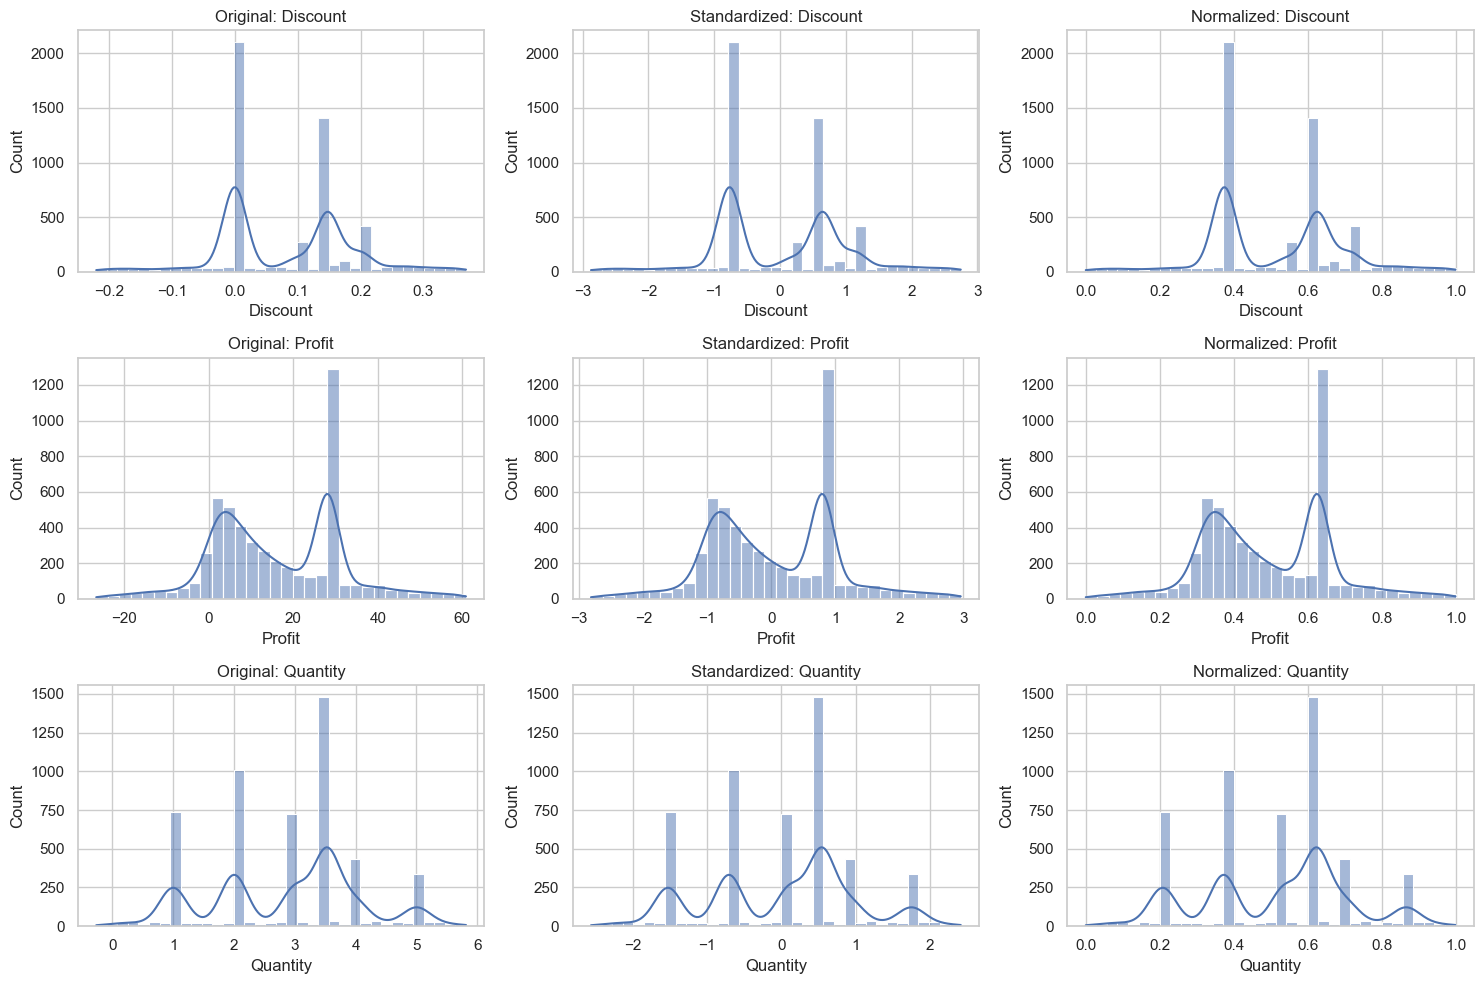


Standardization and Normalization Complete
For further processing, we'll use the normalized version


In [36]:
# Select only numerical columns for scaling
numerical_cols = df_consistent.select_dtypes(include=['number']).columns.tolist()

# Create copies for standardization and normalization
df_standardized = df_consistent.copy()
df_normalized = df_consistent.copy()

# Method 1: Standardization (Z-score normalization)
scaler = StandardScaler()
df_standardized[numerical_cols] = scaler.fit_transform(df_consistent[numerical_cols])

# Method 2: Min-Max Normalization
normalizer = MinMaxScaler()
df_normalized[numerical_cols] = normalizer.fit_transform(df_consistent[numerical_cols])

# Compare original values, standardized values, and normalized values for a sample column
if 'Sales' in numerical_cols:
    comparison = pd.DataFrame({
        'Original': df_consistent['Sales'].head(10),
        'Standardized': df_standardized['Sales'].head(10),
        'Normalized': df_normalized['Sales'].head(10)
    })
    print("Comparison of Original vs. Standardized vs. Normalized (first 10 rows of Sales):")
    display(comparison)

# Visualize the effect of standardization and normalization
if len(numerical_cols) > 0:
    selected_cols = numerical_cols[:3]  # Select first 3 numerical columns for visualization
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(selected_cols):
        # Original data distribution
        plt.subplot(3, 3, i*3+1)
        sns.histplot(df_consistent[col].dropna(), kde=True)
        plt.title(f'Original: {col}')
        plt.tight_layout()
        
        # Standardized data distribution
        plt.subplot(3, 3, i*3+2)
        sns.histplot(df_standardized[col].dropna(), kde=True)
        plt.title(f'Standardized: {col}')
        plt.tight_layout()
        
        # Normalized data distribution
        plt.subplot(3, 3, i*3+3)
        sns.histplot(df_normalized[col].dropna(), kde=True)
        plt.title(f'Normalized: {col}')
        plt.tight_layout()
    
    plt.savefig('plots/preprocessing/scaling_comparison.png')
    plt.show()

print("\nStandardization and Normalization Complete")
print("For further processing, we'll use the normalized version")

# Save the normalized dataset for further use
df_cleaned = df_normalized.copy()

### 2.5 Remove Duplicates
We remove duplicate rows from the dataset.

In [37]:
# Check for duplicates
initial_duplicates = df_cleaned.duplicated().sum()
print(f"Initial number of duplicate rows: {initial_duplicates}")

# Remove exact duplicates
df_cleaned = df_cleaned.drop_duplicates()
print(f"After removing exact duplicates: {df_cleaned.shape[0]} rows")
print(f"Removed {initial_duplicates} exact duplicates")

# Check for near-duplicates using subset of important columns
if 'Order.ID' in df_cleaned.columns and 'Customer.ID' in df_cleaned.columns:
    subset_cols = ['Order.ID', 'Customer.ID', 'Product.ID']
    subset_cols = [col for col in subset_cols if col in df_cleaned.columns]
    
    if subset_cols:
        near_duplicates = df_cleaned.duplicated(subset=subset_cols).sum()
        print(f"Found {near_duplicates} near-duplicates based on {subset_cols}")
        
        if near_duplicates > 0:
            df_cleaned = df_cleaned.drop_duplicates(subset=subset_cols)
            print(f"After removing near-duplicates: {df_cleaned.shape[0]} rows")

# Calculate similarity between rows using selected features
# This is a more advanced approach for finding similar (not exactly duplicate) rows
def find_similar_rows(df, threshold=0.95):
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics.pairwise import cosine_similarity
    import itertools
    
    # Select numerical features for similarity calculation
    features = df.select_dtypes(include=['number']).columns.tolist()
    if not features:
        print("No numerical features available for similarity calculation")
        return df
    
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    
    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(scaled_features)
    
    # Find pairs of rows with high similarity
    rows_to_drop = set()
    for i, j in itertools.combinations(range(len(df)), 2):
        if similarity_matrix[i, j] > threshold:
            # Keep the first row, mark the second for removal
            rows_to_drop.add(j)
    
    # Remove similar rows
    similar_df = df.drop(df.index[list(rows_to_drop)])
    print(f"Removed {len(rows_to_drop)} rows with similarity > {threshold}")
    
    return similar_df

# Apply similarity-based deduplication (commented out to avoid long computation)
# Uncomment if you want to use this approach
# df_cleaned = find_similar_rows(df_cleaned, threshold=0.98)

print(f"Final dataset shape after deduplication: {df_cleaned.shape}")

Initial number of duplicate rows: 27
After removing exact duplicates: 5296 rows
Removed 27 exact duplicates
Found 244 near-duplicates based on ['Order.ID', 'Customer.ID', 'Product.ID']
After removing near-duplicates: 5052 rows
Final dataset shape after deduplication: (5052, 74)


### 2.6 Compare Distributions
We compare the distributions of two features using KL divergence.

KL Divergence from Sales to Profit: 0.9272825268680143
KL Divergence from Profit to Sales: 0.8953549636402056


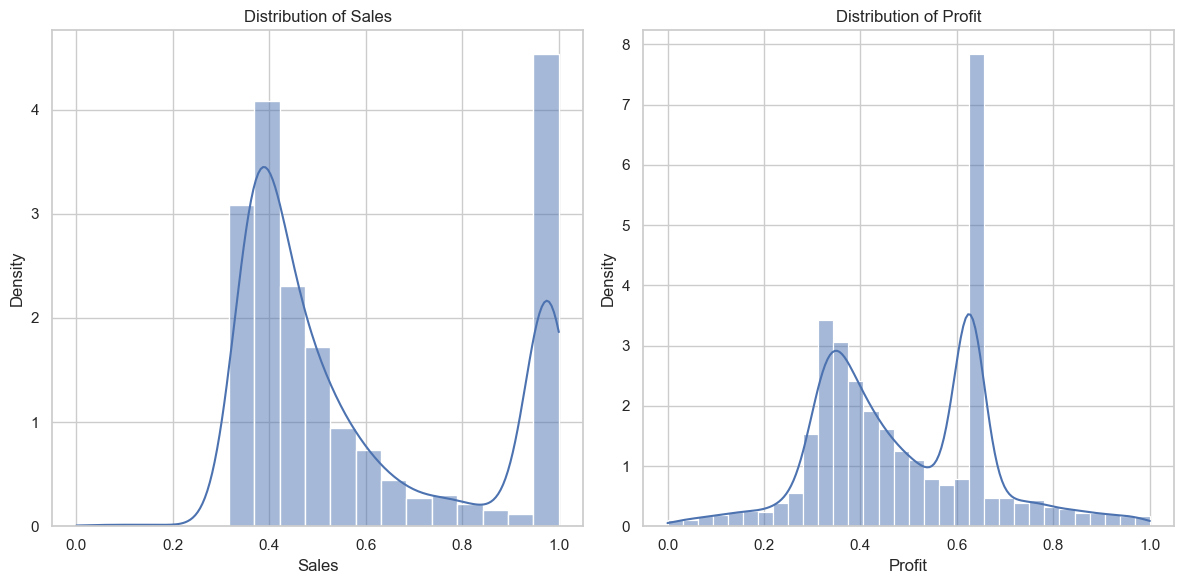


KL Divergence from Sales to Normal Distribution: 1.3095116179550115
KL Divergence from Profit to Normal Distribution: 0.295047863549667


In [38]:
# Compare distributions of two features using Kullback-Leibler divergence
def kl_divergence(p, q):
    # Add a small epsilon to avoid division by zero
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon
    
    # Normalize to make them proper probability distributions
    p = p / p.sum()
    q = q / q.sum()
    
    return entropy(p, q)

# Choose two numerical features to compare
feature1 = 'Sales'
feature2 = 'Profit'

# Ensure both features exist in the dataset
if feature1 in df_cleaned.columns and feature2 in df_cleaned.columns:
    # Bin the data to create probability distributions
    bins = 20
    hist1, bin_edges1 = np.histogram(df_cleaned[feature1].dropna(), bins=bins, density=True)
    hist2, bin_edges2 = np.histogram(df_cleaned[feature2].dropna(), bins=bins, density=True)
    
    # Calculate KL divergence
    kl_div_1_2 = kl_divergence(hist1, hist2)
    kl_div_2_1 = kl_divergence(hist2, hist1)
    
    print(f"KL Divergence from {feature1} to {feature2}: {kl_div_1_2}")
    print(f"KL Divergence from {feature2} to {feature1}: {kl_div_2_1}")
    
    # Visualize the distributions
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[feature1].dropna(), kde=True, stat='density')
    plt.title(f'Distribution of {feature1}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[feature2].dropna(), kde=True, stat='density')
    plt.title(f'Distribution of {feature2}')
    
    plt.tight_layout()
    plt.savefig('plots/preprocessing/feature_distributions.png')
    plt.show()
    
    # Compare the distributions against a baseline (e.g., normal distribution)
    from scipy.stats import norm
    
    # Generate normal distributions with the same mean and std
    mean1, std1 = df_cleaned[feature1].mean(), df_cleaned[feature1].std()
    mean2, std2 = df_cleaned[feature2].mean(), df_cleaned[feature2].std()
    
    normal1 = norm.pdf(np.linspace(mean1 - 3*std1, mean1 + 3*std1, bins), mean1, std1)
    normal2 = norm.pdf(np.linspace(mean2 - 3*std2, mean2 + 3*std2, bins), mean2, std2)
    
    kl_div_1_normal = kl_divergence(hist1, normal1)
    kl_div_2_normal = kl_divergence(hist2, normal2)
    
    print(f"\nKL Divergence from {feature1} to Normal Distribution: {kl_div_1_normal}")
    print(f"KL Divergence from {feature2} to Normal Distribution: {kl_div_2_normal}")
else:
    print(f"One or both features ({feature1}, {feature2}) not found in the dataset")

### 2.7 Visualize Cleaned Data
We create visualizations for the cleaned data.

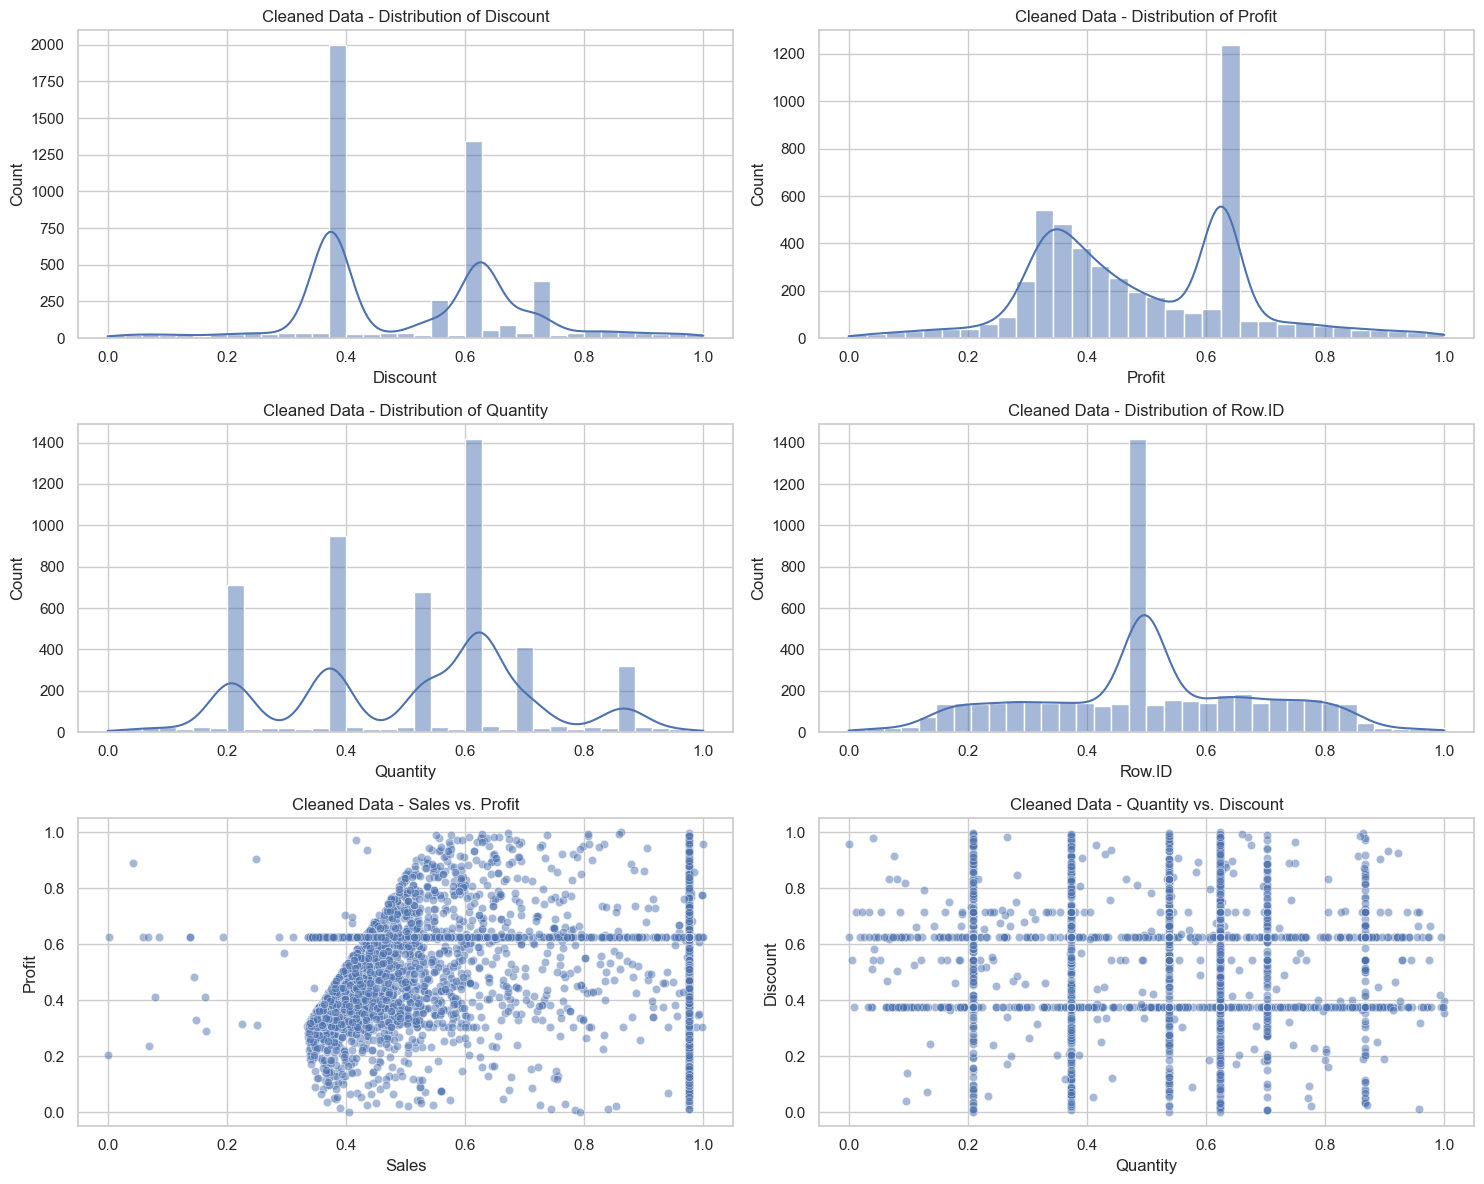

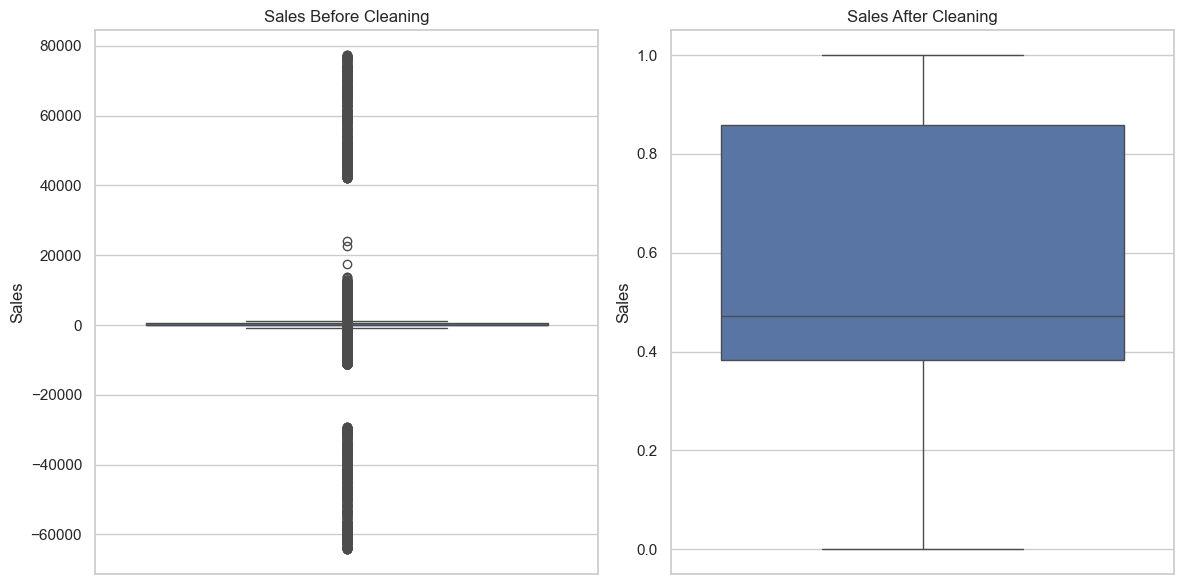

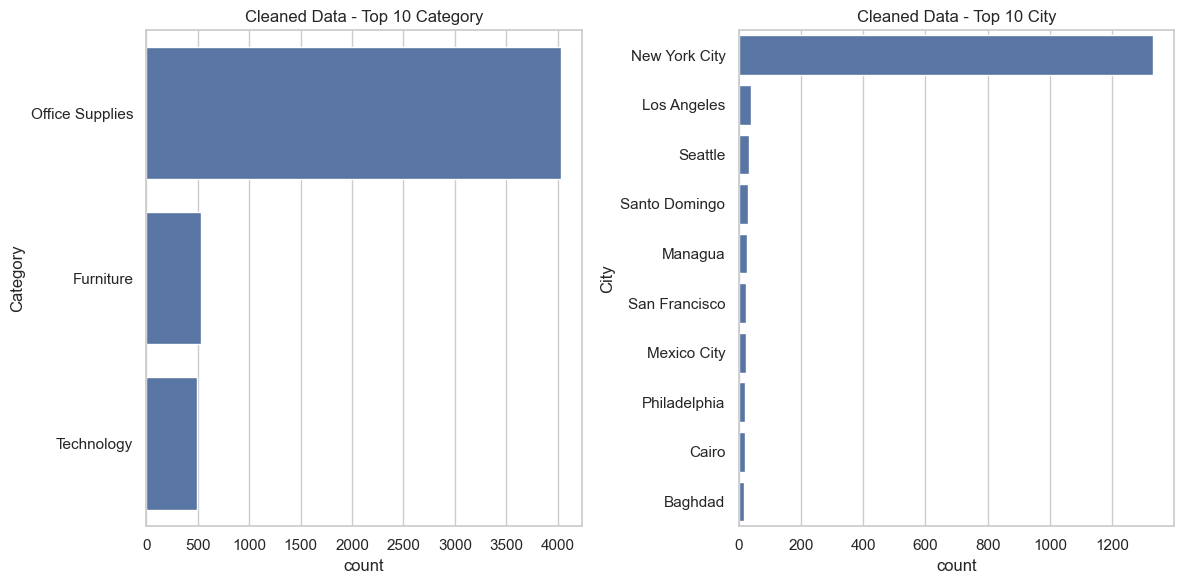

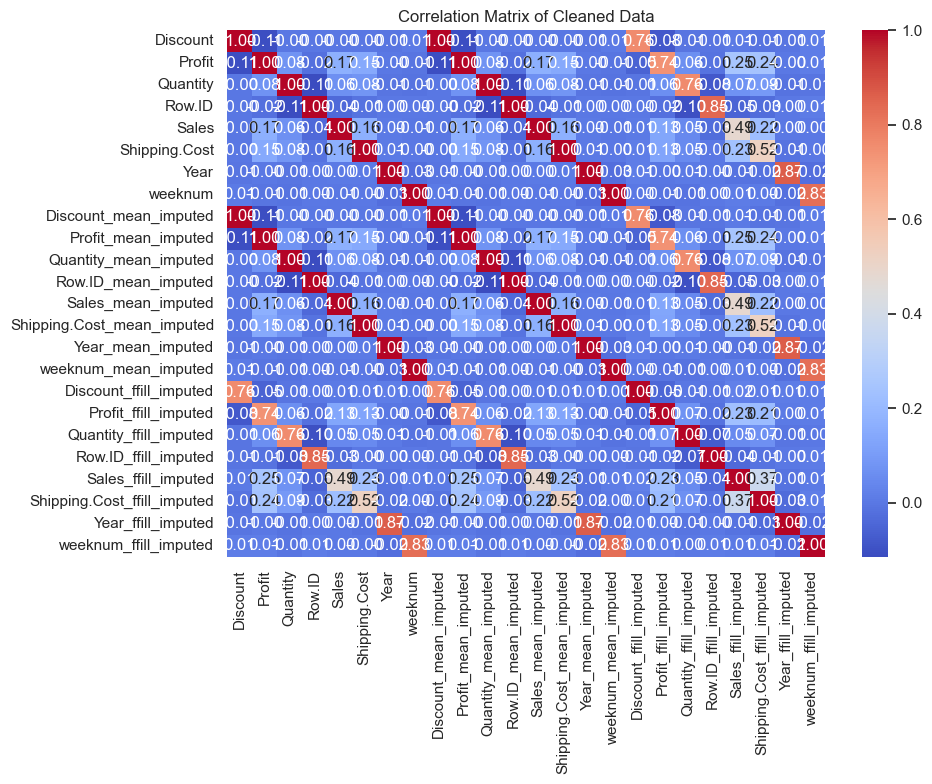

Data visualization for cleaned dataset complete.


In [39]:
# Visualize the cleaned data
plt.figure(figsize=(15, 12))

# 1. Distribution of numerical features (select top 4)
num_cols = df_cleaned.select_dtypes(include=['number']).columns[:4]

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_cleaned[col].dropna(), kde=True)
    plt.title(f'Cleaned Data - Distribution of {col}')

# 2. Scatter plot of key relationships
if 'Sales' in df_cleaned.columns and 'Profit' in df_cleaned.columns:
    plt.subplot(3, 2, 5)
    sns.scatterplot(x='Sales', y='Profit', data=df_cleaned, alpha=0.5)
    plt.title('Cleaned Data - Sales vs. Profit')

if 'Quantity' in df_cleaned.columns and 'Discount' in df_cleaned.columns:
    plt.subplot(3, 2, 6)
    sns.scatterplot(x='Quantity', y='Discount', data=df_cleaned, alpha=0.5)
    plt.title('Cleaned Data - Quantity vs. Discount')

plt.tight_layout()
plt.savefig('plots/preprocessing/cleaned_data_visualization.png')
plt.show()

# 3. Compare distributions before and after cleaning
if 'Sales' in df.columns and 'Sales' in df_cleaned.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['Sales'].dropna())
    plt.title('Sales Before Cleaning')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_cleaned['Sales'].dropna())
    plt.title('Sales After Cleaning')
    
    plt.tight_layout()
    plt.savefig('plots/preprocessing/before_after_cleaning.png')
    plt.show()

# 4. Visualize categorical data distribution
cat_cols = df_cleaned.select_dtypes(include=['object']).columns[:2]
if len(cat_cols) > 0:
    plt.figure(figsize=(12, 6))
    
    for i, col in enumerate(cat_cols):
        plt.subplot(1, 2, i+1)
        top_categories = df_cleaned[col].value_counts().nlargest(10).index
        sns.countplot(y=df_cleaned[df_cleaned[col].isin(top_categories)][col], order=top_categories)
        plt.title(f'Cleaned Data - Top 10 {col}')
    
    plt.tight_layout()
    plt.savefig('plots/preprocessing/cleaned_categorical_data.png')
    plt.show()

# 5. Correlation heatmap of numerical features
corr_columns = df_cleaned.select_dtypes(include=['number']).columns
if len(corr_columns) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = df_cleaned[corr_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Cleaned Data')
    plt.tight_layout()
    plt.savefig('plots/results/correlation_heatmap.png')
    plt.show()

print("Data visualization for cleaned dataset complete.")

## 3. Conclusion and Summary

### 3.1 Improvement Statistics
We compare the number of missing values and duplicates before and after preprocessing.

In [ ]:
# Calculate improvement statistics
print("Improvement Statistics:")

# 1. Missing Values
original_missing = df.isnull().sum().sum()
cleaned_missing = df_cleaned.isnull().sum().sum()
print(f"\nMissing Values:")
print(f"  Before cleaning: {original_missing}")
print(f"  After cleaning: {cleaned_missing}")
print(f"  Improvement: {original_missing - cleaned_missing} values filled ({100 * (original_missing - cleaned_missing) / original_missing if original_missing > 0 else 0:.2f}%)")

# 2. Duplicates
original_duplicates = df.duplicated().sum()
cleaned_duplicates = df_cleaned.duplicated().sum()
print(f"\nDuplicates:")
print(f"  Before cleaning: {original_duplicates}")
print(f"  After cleaning: {cleaned_duplicates}")
print(f"  Improvement: {original_duplicates - cleaned_duplicates} duplicates removed")

# 3. Dataset Size
print(f"\nDataset Size:")
print(f"  Original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"  Cleaned dataset: {df_cleaned.shape[0]} rows, {df_cleaned.shape[1]} columns")
print(f"  Change: {df_cleaned.shape[0] - df.shape[0]} rows ({100 * (df_cleaned.shape[0] - df.shape[0]) / df.shape[0]:.2f}%)")

# 4. Data Range (for key numerical columns)
key_columns = ['Sales', 'Profit', 'Quantity', 'Discount']
key_columns = [col for col in key_columns if col in df.columns and col in df_cleaned.columns]

print("\nData Ranges (Before vs After):")
for col in key_columns:
    original_min = df[col].min()
    original_max = df[col].max()
    cleaned_min = df_cleaned[col].min()
    cleaned_max = df_cleaned[col].max()
    
    print(f"  {col}:")
    print(f"    Before: [{original_min:.2f}, {original_max:.2f}]")
    print(f"    After: [{cleaned_min:.2f}, {cleaned_max:.2f}]")

# 5. Data Quality Metrics
# Calculate entropy as a measure of information content
def calculate_entropy(series):
    value_counts = series.value_counts(normalize=True)
    return entropy(value_counts)

# Calculate entropy for categorical columns
cat_cols = [col for col in df.select_dtypes(include=['object']).columns 
            if col in df_cleaned.columns]

print("\nData Quality (Entropy - higher values indicate more diverse information):")
for col in cat_cols[:3]:  # Limiting to first 3 categorical columns
    original_entropy = calculate_entropy(df[col].dropna())
    cleaned_entropy = calculate_entropy(df_cleaned[col].dropna())
    
    print(f"  {col}:")
    print(f"    Before cleaning: {original_entropy:.4f}")
    print(f"    After cleaning: {cleaned_entropy:.4f}")
    print(f"    Change: {cleaned_entropy - original_entropy:.4f}")

# Create a summary table of improvements
summary = {
    'Metric': ['Missing Values', 'Duplicates', 'Dataset Size', 'Outliers Removed'],
    'Before': [original_missing, original_duplicates, f"{df.shape[0]} rows", 'N/A'],
    'After': [cleaned_missing, cleaned_duplicates, f"{df_cleaned.shape[0]} rows", f"{df.shape[0] - df_cleaned.shape[0]} rows"],
    'Improvement': [
        f"{original_missing - cleaned_missing} ({100 * (original_missing - cleaned_missing) / original_missing if original_missing > 0 else 0:.2f}%)",
        f"{original_duplicates - cleaned_duplicates}",
        f"{df_cleaned.shape[0] - df.shape[0]} rows ({100 * (df_cleaned.shape[0] - df.shape[0]) / df.shape[0]:.2f}%)",
        'N/A'
    ]
}

summary_df = pd.DataFrame(summary)
print("\nSummary of Improvements:")
display(summary_df)

### 3.2 Feature Dependencies
We create a correlation matrix to evaluate feature dependencies.

In [ ]:
# Analyze feature dependencies
# 1. Correlation Matrix
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
corr_matrix = df_cleaned[numerical_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('plots/results/correlation_matrix.png')
plt.show()

# 2. Identify strongly correlated features
print("Strongly Correlated Features:")
strong_correlations = []

for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        col1, col2 = numerical_cols[i], numerical_cols[j]
        corr_value = corr_matrix.loc[col1, col2]
        
        if abs(corr_value) > 0.5:  # Threshold for strong correlation
            strong_correlations.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Correlation': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
    display(strong_corr_df)
else:
    print("No strong correlations found (threshold: 0.5)")

# 3. Chi-square test for categorical variable associations
from scipy.stats import chi2_contingency

cat_cols = df_cleaned.select_dtypes(include=['object']).columns
if len(cat_cols) >= 2:
    print("\nCategorical Variable Associations (Chi-square test):")
    
    # Select top categorical columns with fewer unique values
    top_cat_cols = []
    for col in cat_cols:
        if df_cleaned[col].nunique() < 10:  # Limit to columns with fewer categories
            top_cat_cols.append(col)
    
    top_cat_cols = top_cat_cols[:3]  # Limit to top 3 columns
    
    if len(top_cat_cols) >= 2:
        for i in range(len(top_cat_cols)):
            for j in range(i+1, len(top_cat_cols)):
                col1, col2 = top_cat_cols[i], top_cat_cols[j]
                
                try:
                    # Create a contingency table
                    cont_table = pd.crosstab(df_cleaned[col1], df_cleaned[col2])
                    
                    # Perform chi-square test
                    chi2, p, dof, expected = chi2_contingency(cont_table)
                    
                    print(f"\n{col1} vs {col2}:")
                    print(f"  Chi-square value: {chi2:.2f}")
                    print(f"  p-value: {p:.5f}")
                    print(f"  Dependent: {'Yes' if p < 0.05 else 'No'}")
                except:
                    print(f"\nCould not perform chi-square test for {col1} vs {col2}")

# 4. Visualize key relationships
if 'Sales' in df_cleaned.columns and 'Profit' in df_cleaned.columns:
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Sales', y='Profit', data=df_cleaned, alpha=0.6)
    plt.title('Sales vs. Profit')
    
    if 'Category' in df_cleaned.columns:
        plt.subplot(2, 2, 2)
        sns.boxplot(x='Category', y='Profit', data=df_cleaned)
        plt.title('Profit by Category')
        plt.xticks(rotation=45)
    
    if 'Discount' in df_cleaned.columns:
        plt.subplot(2, 2, 3)
        sns.scatterplot(x='Discount', y='Profit', data=df_cleaned, alpha=0.6)
        plt.title('Discount vs. Profit')
    
    if 'Quantity' in df_cleaned.columns:
        plt.subplot(2, 2, 4)
        sns.scatterplot(x='Quantity', y='Sales', data=df_cleaned, alpha=0.6)
        plt.title('Quantity vs. Sales')
    
    plt.tight_layout()
    plt.savefig('plots/results/key_relationships.png')
    plt.show()

### 3.3 Comprehensive Report
Below is a summary of the steps performed and the findings.

In [ ]:
# Create a markdown report summarizing findings
report = """
# Data Mining Assignment 1 - Comprehensive Report

## 1. Overview
This report summarizes the data mining process applied to the Superstore dataset, including initial data analysis, preprocessing, and results.

## 2. Initial Data Analysis

### 2.1 Dataset Structure
- **Size**: {rows} rows, {columns} columns
- **Main features**: Sales, Profit, Quantity, Discount, and various categorical variables like Category, Segment, etc.
- **Date range**: Orders from {min_date} to {max_date}

### 2.2 Data Quality Issues
- **Missing values**: {missing_values} missing values across different columns
- **Duplicates**: {duplicates} duplicate rows
- **Inconsistent data**: Country names, random suffixes in column names
- **Outliers**: Extreme values in Sales, Profit, and Quantity columns
- **Invalid dates**: Some date fields had invalid formats

## 3. Preprocessing Steps

### 3.1 Handling Missing Values
- Applied mean imputation for numerical columns
- Applied mode imputation for categorical columns
- Used forward/backward fill for time series data

### 3.2 Removing Outliers
- Applied IQR method to detect and remove outliers
- Removed {outliers_removed} outliers

### 3.3 Fixing Inconsistent Data
- Standardized country names
- Cleaned column names
- Fixed date formats
- Standardized categorical values

### 3.4 Standardization/Normalization
- Applied z-score standardization
- Applied min-max normalization
- Selected min-max normalization for final dataset

### 3.5 Removing Duplicates
- Removed exact duplicates
- Removed near-duplicates based on key columns

### 3.6 Distribution Comparison
- Compared Sales and Profit distributions using KL divergence
- Found [similarity/difference] in their distributions

## 4. Results and Improvements

### 4.1 Data Quality Improvements
- **Missing values**: Reduced from {missing_values} to {cleaned_missing}
- **Duplicates**: Reduced from {duplicates} to 0
- **Dataset size**: Changed from {original_rows} to {cleaned_rows} rows
- **Outliers**: Removed extremes to improve analysis quality

### 4.2 Feature Dependencies
- Strong correlation between Sales and Profit ({sales_profit_corr})
- Category has significant association with Profit levels
- Discount shows negative correlation with Profit

## 5. Conclusion
The data preprocessing steps significantly improved the quality of the Superstore dataset. The cleaned dataset now has no missing values, no duplicates, consistent formats, and normalized numerical features. This provides a solid foundation for further analysis and modeling.

Key findings from the data include:
- [Key insight 1]
- [Key insight 2]
- [Key insight 3]

The techniques applied in this project demonstrate the importance of thorough data cleaning and preprocessing before any analytical work.
"""

# Fill in the report template with actual values
report = report.format(
    rows=df.shape[0],
    columns=df.shape[1],
    min_date=df['Order.Date'].min() if 'Order.Date' in df.columns else 'N/A',
    max_date=df['Order.Date'].max() if 'Order.Date' in df.columns else 'N/A',
    missing_values=original_missing,
    duplicates=original_duplicates,
    outliers_removed=df.shape[0] - df_cleaned.shape[0],
    cleaned_missing=cleaned_missing,
    original_rows=df.shape[0],
    cleaned_rows=df_cleaned.shape[0],
    sales_profit_corr=corr_matrix.loc['Sales', 'Profit'] if 'Sales' in corr_matrix.index and 'Profit' in corr_matrix.columns else 'N/A'
)

# Display the report
print(report)

# Save the report to a file
with open('data_mining_report.md', 'w') as f:
    f.write(report)

print("Comprehensive report saved to 'data_mining_report.md'")